In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [174]:
predictions = pd.read_csv("predictionsv2.csv", parse_dates=[0], infer_datetime_format=True)
predictions.head()
dropout_data = predictions.drop(['discharge_vol'], axis=1)
dropout_data.head()

,date,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,2009-12-31,6.647740,7.727784,8.180921,8.078383,7.838336,7.801339,7.445497,8.286781,7.083167,...,7.653887,7.775181,6.679797,8.006769,7.109214,7.616689,7.654238,7.647955,6.938762,7.667274
1,2010-01-01,3.720902,3.793152,3.842977,3.584587,3.860944,3.652962,3.858537,4.208321,3.516557,...,3.877526,3.874301,3.863456,4.034639,3.881428,4.028342,3.667111,4.125309,3.976590,3.652479
2,2010-01-02,3.074069,3.196193,3.001091,3.208452,3.121583,3.000936,3.128223,3.095553,3.262820,...,3.150054,3.171108,3.067422,3.100522,2.807376,3.076757,2.864851,2.981533,3.062598,3.071290
3,2010-01-03,2.843765,2.760933,2.643266,2.664704,2.833594,2.864862,2.716504,2.725471,2.765636,...,2.908847,2.679203,2.503695,2.669351,2.759050,2.852439,2.746631,2.629905,2.620721,2.778472
4,2010-01-04,2.299799,2.336825,2.445569,2.372626,2.501788,2.316968,2.210709,2.432854,2.329690,...,2.278949,2.412294,2.472790,2.382732,2.382827,2.424377,2.357824,2.376079,2.513343,2.385302


In [175]:
dropout_data['mean'] = dropout_data.mean(axis=1)
dropout_data['std'] = dropout_data.std(axis=1)
dropout_data['lower'] = dropout_data['mean'] - 1.96*dropout_data['std']
dropout_data['upper'] = dropout_data['mean'] + 1.96*dropout_data['std']
dropout_data['discharge_vol'] = predictions['discharge_vol']
dropout_data['diff'] = dropout_data['discharge_vol'] - dropout_data['mean']
dropout_data = dropout_data.set_index(dropout_data['date'])
dropout_data.head()

,date,0,1,2,3,4,5,6,7,8,...,97,98,99,100,mean,std,lower,upper,discharge_vol,diff
date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,2009-12-31,6.647740,7.727784,8.180921,8.078383,7.838336,7.801339,7.445497,8.286781,7.083167,...,7.654238,7.647955,6.938762,7.667274,7.508863,0.424961,6.675939,8.341787,5.847917,-1.660946
2010-01-01,2010-01-01,3.720902,3.793152,3.842977,3.584587,3.860944,3.652962,3.858537,4.208321,3.516557,...,3.667111,4.125309,3.976590,3.652479,3.853901,0.178005,3.505011,4.202790,2.672917,-1.180984
2010-01-02,2010-01-02,3.074069,3.196193,3.001091,3.208452,3.121583,3.000936,3.128223,3.095553,3.262820,...,2.864851,2.981533,3.062598,3.071290,3.073473,0.122117,2.834124,3.312822,1.977500,-1.095973
2010-01-03,2010-01-03,2.843765,2.760933,2.643266,2.664704,2.833594,2.864862,2.716504,2.725471,2.765636,...,2.746631,2.629905,2.620721,2.778472,2.745584,0.113542,2.523042,2.968127,1.696667,-1.048918
2010-01-04,2010-01-04,2.299799,2.336825,2.445569,2.372626,2.501788,2.316968,2.210709,2.432854,2.329690,...,2.357824,2.376079,2.513343,2.385302,2.381942,0.082475,2.220291,2.543594,1.525833,-0.856109


In [172]:
dropout_data = dropout_data['2017-01-01':]
dropout_data.head()

,date,0,1,2,3,4,5,6,7,8,...,97,98,99,100,mean,std,lower,upper,discharge_vol,diff
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017-01-01,1.079076,1.128581,1.070429,1.019951,0.993797,1.059452,1.142653,1.004233,1.110108,...,1.078759,1.014486,1.066485,1.122854,1.024676,0.072782,0.882024,1.167328,1.558792,0.534116
2017-01-02,2017-01-02,1.528772,1.479718,1.397819,1.502209,1.370697,1.598771,1.363549,1.537539,1.383361,...,1.421748,1.391600,1.337655,1.520196,1.422334,0.072522,1.280192,1.564476,1.545000,0.122666
2017-01-03,2017-01-03,1.060851,1.154322,1.028563,1.100283,1.075002,1.101683,1.093498,1.079746,1.243321,...,1.136076,1.099417,1.037596,1.084694,1.084416,0.070592,0.946055,1.222776,1.109583,0.025168
2017-01-04,2017-01-04,0.858831,0.807163,0.873940,0.952302,0.919956,1.150232,0.877645,0.913659,0.917861,...,0.900012,0.822418,0.855748,0.814017,0.897916,0.074588,0.751723,1.044109,0.980458,0.082543
2017-01-05,2017-01-05,0.789302,1.093717,0.946427,0.898481,0.824906,0.953305,0.849286,0.656084,0.772342,...,0.788914,0.789033,0.849755,0.845354,0.832740,0.092466,0.651507,1.013973,0.824708,-0.008032


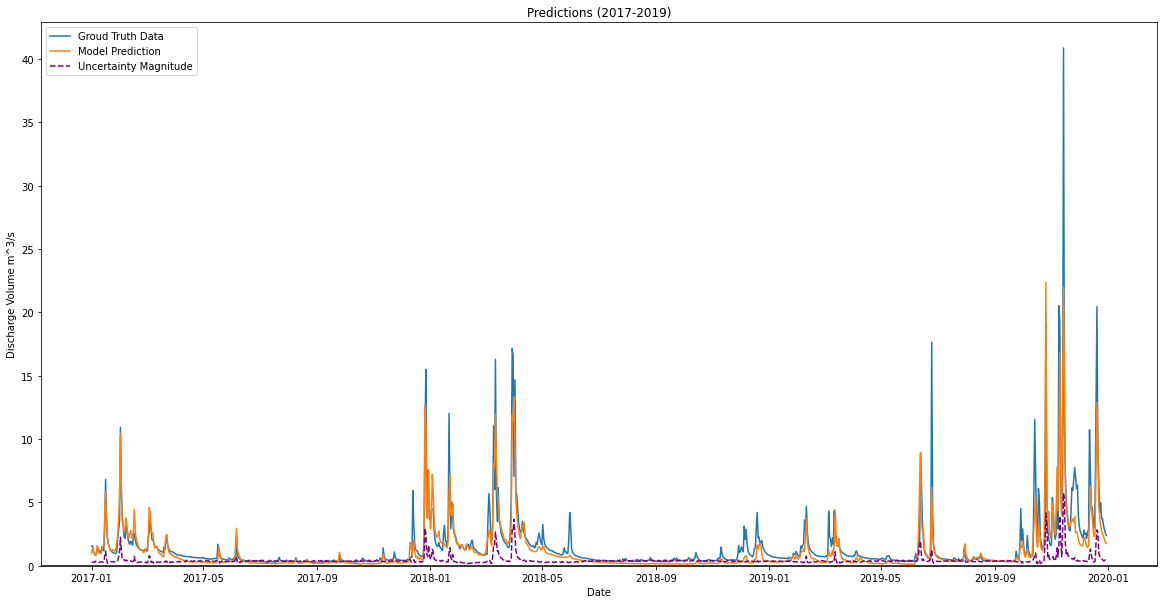

In [173]:
plt.figure(figsize=(20,10))

plt.plot(dropout_data['discharge_vol'], label='Groud Truth Data')
plt.plot(dropout_data['mean'], label='Model Prediction')
#plt.plot(dropout_data['lower'], '--', label="Lower Bound")
#plt.plot(dropout_data['upper'], '--', label="Upper Bound")
plt.plot(dropout_data['upper'] - dropout_data['lower'], '--', color='purple', label='Uncertainty Magnitude')
#plt.fill_between(dropout_data['date'], dropout_data['lower'], dropout_data['upper'], alpha=0.5, color='green', label='Uncertainty')
plt.axhline(y=0.0, color='black', linestyle='-')

plt.title('Predictions (2017-2019)')
plt.xlabel("Date")
plt.xticks(rotation=0)
plt.ylabel("Discharge Volume m^3/s")
plt.ylim(bottom=0)#, top=10)
plt.legend(loc='upper left')

plt.savefig("preds17-10.jpg", bbox_inches='tight')
plt.show()

In [176]:
new_data = []
diff = []
for index, row in dropout_data.iterrows():
    if row['discharge_vol'] >= 5.0:
        #new_data.append([row['discharge_vol'], row['mean'], row['lower'], row['upper']])
        diff.append((row['upper'] - row['lower'])/row['mean']*100)
new_data = np.asarray(new_data)
diff = np.asarray(diff)
print(new_data.shape, diff.shape)

(0,) (230,)


In [178]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
res = moving_average(diff, 30)

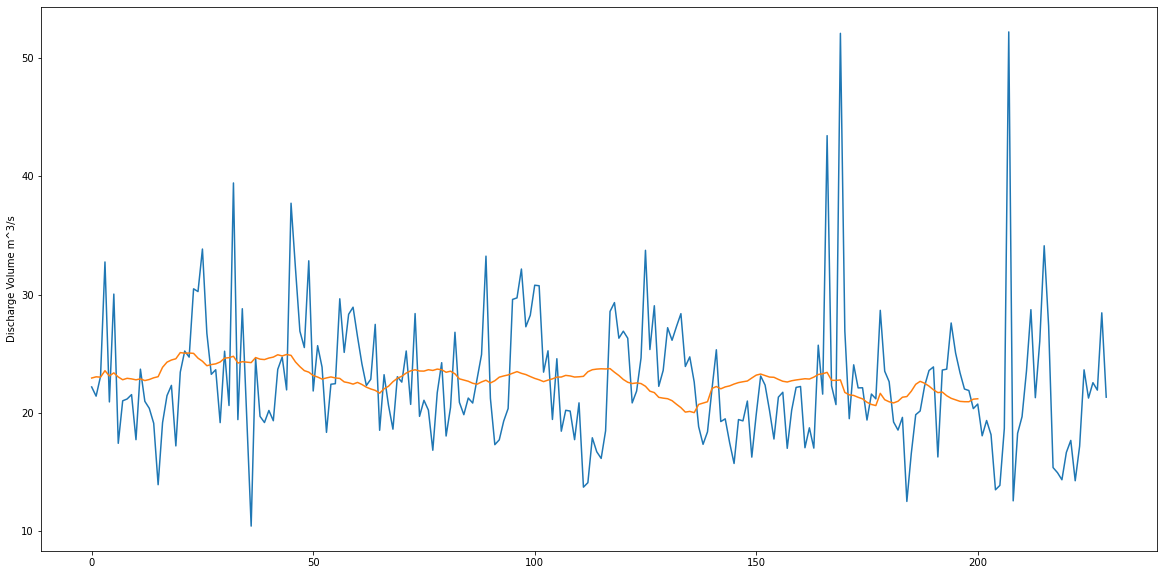

In [179]:
plt.figure(figsize=(20,10))
plt.plot(diff)
plt.plot(res)
plt.ylabel("Discharge Volume m^3/s")
plt.show()